In [65]:
import numpy as np
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from text_utils import clean_sentence
from sklearn.metrics import classification_report

In [2]:
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical 
from keras.backend import clear_session
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

https://realpython.com/python-keras-text-classification/

https://github.com/marcotcr/lime

https://github.com/slundberg/shap    

In [3]:
emotion_t=pd.read_csv('text_emotion.csv')
print(len(emotion_t))
print(emotion_t.info())
emotion_t.head(10)

40000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
5,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,mcsleazy,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,nic0lepaula,@charviray Charlene my love. I miss you
9,1956969172,sadness,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?


In [4]:
emotion_t['clean_content'] = emotion_t['content'].apply(clean_sentence)

In [403]:
emotion_t['clean_content'][:5]

0    know listenin bad habit ear start freakin part
1              layin bed headach ughhh  waitin cal 
2                       fun ceremony  gloom friday 
3                             want hang friend soon
4                want trad someon houston ticket on
Name: clean_content, dtype: object

In [365]:
emotion_t['sentiment'][:5]

0         empty
1       sadness
2       sadness
3    enthusiasm
4       neutral
Name: sentiment, dtype: object

In [6]:
emotion_t.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [7]:
emotion_t.shape

(40000, 5)

In [8]:
max(emotion_t['clean_content'].apply(len)) # longueur de la plus longue phrase

116

In [87]:
#coprus et target en array
corpus = emotion_t['clean_content'].values
target = emotion_t['sentiment'].values
corpus


['anger' 'boredom' 'empty' 'enthusiasm' 'fun' 'happiness' 'hate' 'love'
 'neutral' 'relief' 'sadness' 'surprise' 'worry']


In [312]:
# encodage de targets
le = preprocessing.LabelEncoder()
Y = le.fit_transform(target)
Y

array([ 2, 10, 10, ...,  7,  5,  7])

In [12]:
vec = CountVectorizer(min_df=0, lowercase=False)
vec.fit(corpus) # normalement sur corpus_train mais de toute facon le model verra tout a un moment 
vec.vocabulary_

{'know': 10470,
 'listenin': 11003,
 'bad': 2226,
 'habit': 8315,
 'ear': 6019,
 'start': 17341,
 'freakin': 7290,
 'part': 13825,
 'layin': 10754,
 'bed': 2510,
 'headach': 8585,
 'ughhh': 19297,
 'waitin': 19953,
 'cal': 3559,
 'fun': 7458,
 'ceremony': 3874,
 'gloom': 7861,
 'friday': 7351,
 'want': 20008,
 'hang': 8444,
 'friend': 7356,
 'soon': 17008,
 'trad': 18815,
 'someon': 16976,
 'houston': 9028,
 'ticket': 18496,
 'on': 13400,
 'rep': 15308,
 'prom': 14679,
 'lik': 10941,
 'sleep': 16734,
 'think': 18361,
 'old': 13352,
 'hes': 8736,
 'marry': 11580,
 'damn': 5086,
 'scand': 15947,
 'hmmm': 8839,
 'charl': 3950,
 'lov': 11204,
 'miss': 12067,
 'im': 9363,
 'sorry': 17031,
 'least': 10790,
 'cant': 3654,
 'fal': 6707,
 'asleep': 1951,
 'chok': 4119,
 'retain': 15384,
 'ugh': 19294,
 'beat': 2470,
 'stupid': 17605,
 'song': 16995,
 'get': 7735,
 'next': 12841,
 'rud': 15688,
 'watch': 20055,
 'hil': 8793,
 'london': 11116,
 'real': 15084,
 'tourt': 18786,
 'week': 20152,
 'la

In [13]:
#split des données
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, Y, test_size=0.25, random_state=1000)

In [14]:
vec.fit(corpus_train)
X_train = vec.transform(corpus_train)
X_test = vec.transform(corpus_test)
X_train

<30000x17835 sparse matrix of type '<class 'numpy.int64'>'
	with 197838 stored elements in Compressed Sparse Row format>

In [15]:
#regression logistic pour comparaison
classifier =LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.3388


/home/cecilia/anaconda3/envs/newbies/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
print(type(X_train))
print(type(y_train))

print((X_train.shape))
print((y_train.shape))

print((X_train[:3]))
print((y_train[:3]))


<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>
(30000, 17835)
(30000,)
  (0, 6045)	1
  (0, 7096)	1
  (0, 12181)	1
  (0, 14287)	1
  (1, 3043)	1
  (1, 7862)	1
  (1, 12123)	1
  (1, 14054)	1
  (2, 5522)	1
  (2, 16964)	1
[ 8 10  5]


In [17]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

# KERAS

In [18]:
clear_session()

In [19]:
input_dim = X_train.shape[1] #connaitre les valeurs d'entrée, features
model = Sequential()


model.add(layers.Dense(units =10, activation = 'relu', input_dim=input_dim))
model.add(layers.Dense(units =10, activation = 'relu'))
model.add(layers.Dense(units =10, activation = 'relu'))
model.add(layers.Dense(units =13, activation = 'softmax'))
model.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy') 
#.compile() spécifie l'optimiseur et la fonction de perte. 

model.summary() #pour donner un aperçu du modèle et du nombre de paramètres disponibles

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                178360    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 13)                143       
Total params: 178,723
Trainable params: 178,723
Non-trainable params: 0
_________________________________________________________________


In [20]:
input_dim

17835

In [21]:
X_train = X_train.sorted_indices()
X_test = X_test.sorted_indices()

In [22]:
history = model.fit(X_train, y_train, epochs=300, verbose=2, validation_data=(X_test, y_test), batch_size=30000)
#batch_size= nombre d'échantillons que nous voulons utiliser à une époch
    #combien d'échantillons sont utilisés dans un passage avant / arrière
#validation_data= Données sur lesquelles évaluer la perte et toute métrique
    #du modèle à la fin de chaque époque. Le modèle ne sera pas formé sur ces données.

Epoch 1/300
1/1 - 0s - loss: 2.5642 - accuracy: 0.1256 - val_loss: 2.5625 - val_accuracy: 0.1936
Epoch 2/300
1/1 - 0s - loss: 2.5618 - accuracy: 0.1942 - val_loss: 2.5605 - val_accuracy: 0.2068
Epoch 3/300
1/1 - 0s - loss: 2.5593 - accuracy: 0.2164 - val_loss: 2.5584 - val_accuracy: 0.2132
Epoch 4/300
1/1 - 0s - loss: 2.5568 - accuracy: 0.2257 - val_loss: 2.5562 - val_accuracy: 0.2170
Epoch 5/300
1/1 - 0s - loss: 2.5541 - accuracy: 0.2291 - val_loss: 2.5539 - val_accuracy: 0.2162
Epoch 6/300
1/1 - 0s - loss: 2.5513 - accuracy: 0.2305 - val_loss: 2.5515 - val_accuracy: 0.2173
Epoch 7/300
1/1 - 0s - loss: 2.5483 - accuracy: 0.2317 - val_loss: 2.5490 - val_accuracy: 0.2206
Epoch 8/300
1/1 - 0s - loss: 2.5453 - accuracy: 0.2337 - val_loss: 2.5464 - val_accuracy: 0.2210
Epoch 9/300
1/1 - 0s - loss: 2.5421 - accuracy: 0.2343 - val_loss: 2.5438 - val_accuracy: 0.2216
Epoch 10/300
1/1 - 0s - loss: 2.5387 - accuracy: 0.2350 - val_loss: 2.5410 - val_accuracy: 0.2229
Epoch 11/300
1/1 - 0s - loss:

Epoch 85/300
1/1 - 0s - loss: 2.0082 - accuracy: 0.4119 - val_loss: 2.2017 - val_accuracy: 0.2988
Epoch 86/300
1/1 - 0s - loss: 2.0002 - accuracy: 0.4145 - val_loss: 2.1986 - val_accuracy: 0.2997
Epoch 87/300
1/1 - 0s - loss: 1.9922 - accuracy: 0.4178 - val_loss: 2.1955 - val_accuracy: 0.3005
Epoch 88/300
1/1 - 0s - loss: 1.9842 - accuracy: 0.4206 - val_loss: 2.1925 - val_accuracy: 0.3015
Epoch 89/300
1/1 - 0s - loss: 1.9763 - accuracy: 0.4241 - val_loss: 2.1895 - val_accuracy: 0.3023
Epoch 90/300
1/1 - 0s - loss: 1.9683 - accuracy: 0.4272 - val_loss: 2.1866 - val_accuracy: 0.3023
Epoch 91/300
1/1 - 0s - loss: 1.9604 - accuracy: 0.4302 - val_loss: 2.1838 - val_accuracy: 0.3042
Epoch 92/300
1/1 - 0s - loss: 1.9525 - accuracy: 0.4329 - val_loss: 2.1810 - val_accuracy: 0.3049
Epoch 93/300
1/1 - 0s - loss: 1.9446 - accuracy: 0.4357 - val_loss: 2.1783 - val_accuracy: 0.3054
Epoch 94/300
1/1 - 0s - loss: 1.9367 - accuracy: 0.4378 - val_loss: 2.1757 - val_accuracy: 0.3070
Epoch 95/300
1/1 - 0

Epoch 168/300
1/1 - 0s - loss: 1.4444 - accuracy: 0.5469 - val_loss: 2.1287 - val_accuracy: 0.3180
Epoch 169/300
1/1 - 0s - loss: 1.4389 - accuracy: 0.5488 - val_loss: 2.1301 - val_accuracy: 0.3174
Epoch 170/300
1/1 - 0s - loss: 1.4334 - accuracy: 0.5509 - val_loss: 2.1315 - val_accuracy: 0.3167
Epoch 171/300
1/1 - 0s - loss: 1.4280 - accuracy: 0.5529 - val_loss: 2.1331 - val_accuracy: 0.3156
Epoch 172/300
1/1 - 0s - loss: 1.4226 - accuracy: 0.5550 - val_loss: 2.1346 - val_accuracy: 0.3147
Epoch 173/300
1/1 - 0s - loss: 1.4173 - accuracy: 0.5569 - val_loss: 2.1363 - val_accuracy: 0.3142
Epoch 174/300
1/1 - 0s - loss: 1.4120 - accuracy: 0.5587 - val_loss: 2.1380 - val_accuracy: 0.3139
Epoch 175/300
1/1 - 0s - loss: 1.4067 - accuracy: 0.5602 - val_loss: 2.1397 - val_accuracy: 0.3140
Epoch 176/300
1/1 - 0s - loss: 1.4014 - accuracy: 0.5624 - val_loss: 2.1415 - val_accuracy: 0.3133
Epoch 177/300
1/1 - 0s - loss: 1.3961 - accuracy: 0.5641 - val_loss: 2.1434 - val_accuracy: 0.3139
Epoch 178/

Epoch 251/300
1/1 - 0s - loss: 1.0813 - accuracy: 0.6654 - val_loss: 2.3894 - val_accuracy: 0.3083
Epoch 252/300
1/1 - 0s - loss: 1.0780 - accuracy: 0.6670 - val_loss: 2.3938 - val_accuracy: 0.3083
Epoch 253/300
1/1 - 0s - loss: 1.0747 - accuracy: 0.6681 - val_loss: 2.3983 - val_accuracy: 0.3077
Epoch 254/300
1/1 - 0s - loss: 1.0714 - accuracy: 0.6689 - val_loss: 2.4028 - val_accuracy: 0.3075
Epoch 255/300
1/1 - 0s - loss: 1.0681 - accuracy: 0.6702 - val_loss: 2.4073 - val_accuracy: 0.3076
Epoch 256/300
1/1 - 0s - loss: 1.0649 - accuracy: 0.6715 - val_loss: 2.4118 - val_accuracy: 0.3075
Epoch 257/300
1/1 - 0s - loss: 1.0617 - accuracy: 0.6724 - val_loss: 2.4163 - val_accuracy: 0.3072
Epoch 258/300
1/1 - 0s - loss: 1.0585 - accuracy: 0.6739 - val_loss: 2.4209 - val_accuracy: 0.3075
Epoch 259/300
1/1 - 0s - loss: 1.0553 - accuracy: 0.6751 - val_loss: 2.4254 - val_accuracy: 0.3073
Epoch 260/300
1/1 - 0s - loss: 1.0521 - accuracy: 0.6764 - val_loss: 2.4300 - val_accuracy: 0.3071
Epoch 261/

In [23]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=1)
print("training accuracy: {:.4f}".format(accuracy))

938/938 [==============================] - 1s 1ms/step - loss: 0.9388 - accuracy: 0.7164
training accuracy: 0.7164


In [24]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("testing accuracy: {:.4f}".format(accuracy))

313/313 [==============================] - 0s 1ms/step - loss: 2.6271 - accuracy: 0.3003
testing accuracy: 0.3003


In [25]:
print(model.history)

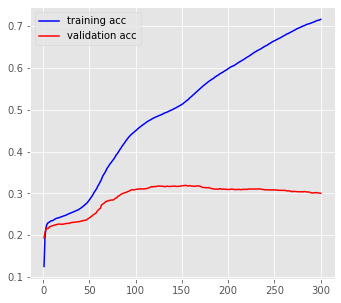

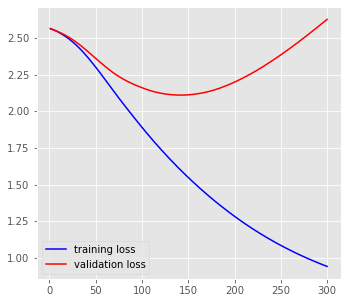

In [26]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1,len(acc)+1)
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(x,acc,'b',label='training acc')
    plt.plot(x,val_acc,'r',label='validation acc')
    #plt.tittle('training et validation accuracy')
    plt.legend()
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,2)
    plt.plot(x,loss,'b',label='training loss')
    plt.plot(x,val_loss,'r',label='validation loss')
    #plt.tittle('training et validation loss')
    plt.legend()
    
plot_history(history)  

l'accuracy plafonne a 0,3 comme pour la logistic regression, le loss montre un sur entrainement a partir d'environ 125 epoch. ----------------------------------------------

In [27]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# word embeddings

In [28]:
clear_session()

In [343]:
#Tokenization
tok = Tokenizer(num_words=5000) #les 5000 plus courants
tok.fit_on_texts(corpus_train)

X_train = tok.texts_to_sequences(corpus_train)
X_test = tok.texts_to_sequences(corpus_test)

vocab_size =len(tok.word_index) +1  #indexation ordonné des mots

print(corpus_train[2])
print(X_train[2])

excit week
[172, 50]


In [30]:
tok.word_index

{'day': 1,
 'im': 2,
 'get': 3,
 'good': 4,
 'lov': 5,
 'work': 6,
 'lik': 7,
 'got': 8,
 'today': 9,
 'real': 10,
 'going': 11,
 'tim': 12,
 'on': 13,
 'thank': 14,
 'happy': 15,
 'cant': 16,
 'lol': 17,
 'know': 18,
 'miss': 19,
 'want': 20,
 'back': 21,
 'see': 22,
 'think': 23,
 'feel': 24,
 'moth': 25,
 'new': 26,
 'night': 27,
 'wel': 28,
 'hop': 29,
 'mak': 30,
 'hom': 31,
 'look': 32,
 'nee': 33,
 'com': 34,
 'stil': 35,
 'ev': 36,
 'watch': 37,
 'much': 38,
 'twit': 39,
 'gre': 40,
 'wish': 41,
 'morn': 42,
 'hah': 43,
 'last': 44,
 'fin': 45,
 'sad': 46,
 'il': 47,
 'that': 48,
 'fun': 49,
 'week': 50,
 'mom': 51,
 'bad': 52,
 'thing': 53,
 'tomorrow': 54,
 'sorry': 55,
 'would': 56,
 'tonight': 57,
 'wait': 58,
 'nic': 59,
 'bet': 60,
 'right': 61,
 'sleep': 62,
 'friend': 63,
 'follow': 64,
 'say': 65,
 'show': 66,
 'tak': 67,
 'hat': 68,
 'yeah': 69,
 'try': 70,
 'though': 71,
 'could': 72,
 'iv': 73,
 'weekend': 74,
 'way': 75,
 'us': 76,
 'gonn': 77,
 'ye': 78,
 'hour': 

In [319]:
#séquence de texte avec longueur de mots différente. 
#pad_sequence()qui remplit simplement la séquence de mots avec des zéros. pour que toute les entrées est la mm longueur

maxlen = 116
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0,:])
print(corpus_train[0])

[ 142  171  628 1589    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
sooo hap pow for


In [318]:
tok.word_index.items() #tuple pour iteration par exemple

dict_items([('day', 1), ('im', 2), ('get', 3), ('good', 4), ('lov', 5), ('work', 6), ('lik', 7), ('got', 8), ('today', 9), ('real', 10), ('going', 11), ('tim', 12), ('on', 13), ('thank', 14), ('happy', 15), ('cant', 16), ('lol', 17), ('know', 18), ('miss', 19), ('want', 20), ('back', 21), ('see', 22), ('think', 23), ('feel', 24), ('moth', 25), ('new', 26), ('night', 27), ('wel', 28), ('hop', 29), ('mak', 30), ('hom', 31), ('look', 32), ('nee', 33), ('com', 34), ('stil', 35), ('ev', 36), ('watch', 37), ('much', 38), ('twit', 39), ('gre', 40), ('wish', 41), ('morn', 42), ('hah', 43), ('last', 44), ('fin', 45), ('sad', 46), ('il', 47), ('that', 48), ('fun', 49), ('week', 50), ('mom', 51), ('bad', 52), ('thing', 53), ('tomorrow', 54), ('sorry', 55), ('would', 56), ('tonight', 57), ('wait', 58), ('nic', 59), ('bet', 60), ('right', 61), ('sleep', 62), ('friend', 63), ('follow', 64), ('say', 65), ('show', 66), ('tak', 67), ('hat', 68), ('yeah', 69), ('try', 70), ('though', 71), ('could', 72),

In [34]:
#input_dim: la taille du vocabulaire 
#output_dim: la taille du vecteur dense
#input_length: la longueur de la séquence

model1 = Sequential()
embedding_dim = 50

model1.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
          
model1.add(layers.Flatten()) #applatit l'entrée
model1.add(layers.Dense(units =10, activation = 'relu'))
model1.add(layers.Dense(units =13, activation = 'softmax'))
model1.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy') 


model1.summary() 
   


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 116, 50)           892100    
_________________________________________________________________
flatten (Flatten)            (None, 5800)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                58010     
_________________________________________________________________
dense_1 (Dense)              (None, 13)                143       
Total params: 950,253
Trainable params: 950,253
Non-trainable params: 0
_________________________________________________________________


In [36]:
history1 = model1.fit(X_train, y_train, epochs=300, verbose=2, validation_data=(X_test, y_test), batch_size=30000)

Epoch 1/300
1/1 - 0s - loss: 2.5603 - accuracy: 0.0435 - val_loss: 2.5143 - val_accuracy: 0.1270
Epoch 2/300
1/1 - 0s - loss: 2.5138 - accuracy: 0.1266 - val_loss: 2.4771 - val_accuracy: 0.2113
Epoch 3/300
1/1 - 0s - loss: 2.4763 - accuracy: 0.2096 - val_loss: 2.4462 - val_accuracy: 0.2166
Epoch 4/300
1/1 - 0s - loss: 2.4450 - accuracy: 0.2158 - val_loss: 2.4221 - val_accuracy: 0.2166
Epoch 5/300
1/1 - 0s - loss: 2.4206 - accuracy: 0.2157 - val_loss: 2.4056 - val_accuracy: 0.2166
Epoch 6/300
1/1 - 0s - loss: 2.4037 - accuracy: 0.2157 - val_loss: 2.3959 - val_accuracy: 0.2166
Epoch 7/300
1/1 - 0s - loss: 2.3936 - accuracy: 0.2157 - val_loss: 2.3902 - val_accuracy: 0.2166
Epoch 8/300
1/1 - 0s - loss: 2.3874 - accuracy: 0.2157 - val_loss: 2.3855 - val_accuracy: 0.2166
Epoch 9/300
1/1 - 0s - loss: 2.3822 - accuracy: 0.2157 - val_loss: 2.3795 - val_accuracy: 0.2166
Epoch 10/300
1/1 - 0s - loss: 2.3757 - accuracy: 0.2157 - val_loss: 2.3717 - val_accuracy: 0.2166
Epoch 11/300
1/1 - 0s - loss:

Epoch 85/300
1/1 - 0s - loss: 2.0036 - accuracy: 0.3276 - val_loss: 2.1119 - val_accuracy: 0.2686
Epoch 86/300
1/1 - 0s - loss: 1.9996 - accuracy: 0.3288 - val_loss: 2.1109 - val_accuracy: 0.2686
Epoch 87/300
1/1 - 0s - loss: 1.9956 - accuracy: 0.3299 - val_loss: 2.1100 - val_accuracy: 0.2689
Epoch 88/300
1/1 - 0s - loss: 1.9915 - accuracy: 0.3307 - val_loss: 2.1091 - val_accuracy: 0.2691
Epoch 89/300
1/1 - 0s - loss: 1.9875 - accuracy: 0.3313 - val_loss: 2.1082 - val_accuracy: 0.2690
Epoch 90/300
1/1 - 0s - loss: 1.9835 - accuracy: 0.3323 - val_loss: 2.1073 - val_accuracy: 0.2692
Epoch 91/300
1/1 - 0s - loss: 1.9794 - accuracy: 0.3329 - val_loss: 2.1065 - val_accuracy: 0.2692
Epoch 92/300
1/1 - 0s - loss: 1.9754 - accuracy: 0.3341 - val_loss: 2.1057 - val_accuracy: 0.2693
Epoch 93/300
1/1 - 0s - loss: 1.9713 - accuracy: 0.3351 - val_loss: 2.1050 - val_accuracy: 0.2698
Epoch 94/300
1/1 - 0s - loss: 1.9672 - accuracy: 0.3362 - val_loss: 2.1042 - val_accuracy: 0.2706
Epoch 95/300
1/1 - 0

Epoch 168/300
1/1 - 0s - loss: 1.6461 - accuracy: 0.4655 - val_loss: 2.1085 - val_accuracy: 0.2927
Epoch 169/300
1/1 - 0s - loss: 1.6417 - accuracy: 0.4671 - val_loss: 2.1095 - val_accuracy: 0.2931
Epoch 170/300
1/1 - 0s - loss: 1.6374 - accuracy: 0.4693 - val_loss: 2.1106 - val_accuracy: 0.2925
Epoch 171/300
1/1 - 0s - loss: 1.6330 - accuracy: 0.4712 - val_loss: 2.1117 - val_accuracy: 0.2926
Epoch 172/300
1/1 - 0s - loss: 1.6287 - accuracy: 0.4731 - val_loss: 2.1128 - val_accuracy: 0.2925
Epoch 173/300
1/1 - 0s - loss: 1.6244 - accuracy: 0.4743 - val_loss: 2.1140 - val_accuracy: 0.2934
Epoch 174/300
1/1 - 0s - loss: 1.6201 - accuracy: 0.4764 - val_loss: 2.1152 - val_accuracy: 0.2935
Epoch 175/300
1/1 - 0s - loss: 1.6158 - accuracy: 0.4784 - val_loss: 2.1164 - val_accuracy: 0.2940
Epoch 176/300
1/1 - 0s - loss: 1.6115 - accuracy: 0.4803 - val_loss: 2.1177 - val_accuracy: 0.2950
Epoch 177/300
1/1 - 0s - loss: 1.6072 - accuracy: 0.4820 - val_loss: 2.1190 - val_accuracy: 0.2952
Epoch 178/

Epoch 251/300
1/1 - 0s - loss: 1.3135 - accuracy: 0.5922 - val_loss: 2.2936 - val_accuracy: 0.2913
Epoch 252/300
1/1 - 0s - loss: 1.3098 - accuracy: 0.5936 - val_loss: 2.2971 - val_accuracy: 0.2913
Epoch 253/300
1/1 - 0s - loss: 1.3062 - accuracy: 0.5951 - val_loss: 2.3003 - val_accuracy: 0.2914
Epoch 254/300
1/1 - 0s - loss: 1.3026 - accuracy: 0.5969 - val_loss: 2.3040 - val_accuracy: 0.2914
Epoch 255/300
1/1 - 0s - loss: 1.2990 - accuracy: 0.5984 - val_loss: 2.3074 - val_accuracy: 0.2911
Epoch 256/300
1/1 - 0s - loss: 1.2954 - accuracy: 0.5997 - val_loss: 2.3108 - val_accuracy: 0.2914
Epoch 257/300
1/1 - 0s - loss: 1.2918 - accuracy: 0.6017 - val_loss: 2.3147 - val_accuracy: 0.2917
Epoch 258/300
1/1 - 0s - loss: 1.2882 - accuracy: 0.6031 - val_loss: 2.3181 - val_accuracy: 0.2912
Epoch 259/300
1/1 - 0s - loss: 1.2846 - accuracy: 0.6049 - val_loss: 2.3217 - val_accuracy: 0.2912
Epoch 260/300
1/1 - 0s - loss: 1.2811 - accuracy: 0.6066 - val_loss: 2.3255 - val_accuracy: 0.2905
Epoch 261/

In [37]:
loss, accuracy = model1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.6507
Testing Accuracy:  0.2853


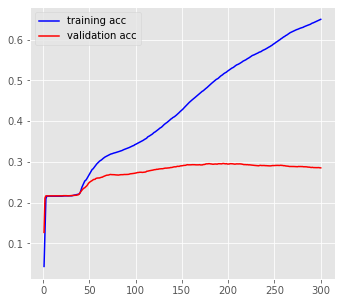

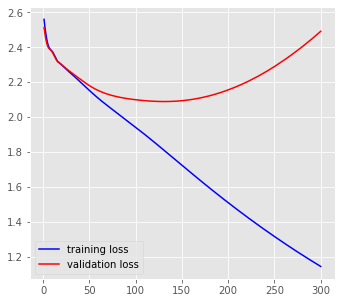

In [38]:
plot_history(history1)

In [39]:
clear_session()

In [40]:
model2 = Sequential()
embedding_dim = 50

model2.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))

model2.add(layers.GlobalMaxPool1D()) 
model2.add(layers.Dense(units =100, activation = 'relu'))
model2.add(layers.Dense(units =64, activation = 'relu'))
model2.add(layers.Dense(units =64, activation = 'relu'))
model2.add(layers.Dense(units =13, activation = 'softmax'))
model2.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy') 


model2.summary() 
   

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 116, 50)           892100    
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               5100      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 13)                845       
Total params: 908,669
Trainable params: 908,669
Non-trainable params: 0
__________________________________________________

In [41]:
history2 = model2.fit(X_train, y_train, epochs=45, verbose=2, validation_data=(X_test, y_test), batch_size=10000)

Epoch 1/45
3/3 - 1s - loss: 2.5554 - accuracy: 0.1785 - val_loss: 2.5402 - val_accuracy: 0.2074
Epoch 2/45
3/3 - 1s - loss: 2.5311 - accuracy: 0.2110 - val_loss: 2.5137 - val_accuracy: 0.2104
Epoch 3/45
3/3 - 1s - loss: 2.5021 - accuracy: 0.2123 - val_loss: 2.4805 - val_accuracy: 0.2102
Epoch 4/45
3/3 - 1s - loss: 2.4655 - accuracy: 0.2119 - val_loss: 2.4383 - val_accuracy: 0.2102
Epoch 5/45
3/3 - 1s - loss: 2.4192 - accuracy: 0.2119 - val_loss: 2.3862 - val_accuracy: 0.2102
Epoch 6/45
3/3 - 1s - loss: 2.3630 - accuracy: 0.2119 - val_loss: 2.3268 - val_accuracy: 0.2102
Epoch 7/45
3/3 - 1s - loss: 2.3016 - accuracy: 0.2119 - val_loss: 2.2684 - val_accuracy: 0.2102
Epoch 8/45
3/3 - 1s - loss: 2.2462 - accuracy: 0.2119 - val_loss: 2.2266 - val_accuracy: 0.2102
Epoch 9/45
3/3 - 1s - loss: 2.2118 - accuracy: 0.2119 - val_loss: 2.2095 - val_accuracy: 0.2102
Epoch 10/45
3/3 - 1s - loss: 2.1961 - accuracy: 0.2161 - val_loss: 2.2011 - val_accuracy: 0.2470
Epoch 11/45
3/3 - 1s - loss: 2.1860 - a

In [42]:
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5103
Testing Accuracy:  0.3139


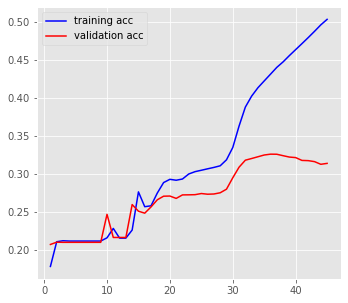

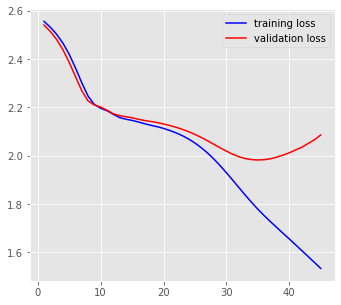

In [43]:
plot_history(history2)

# Utilisation des incorporations de mots pré-entraînées 

In [44]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix


In [45]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
     '/home/cecilia/Documents/brief/brief_deep/glove.6B.50d.txt',
     tok.word_index, embedding_dim)

In [46]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.5439412621903374

In [47]:
clear_session()

In [48]:
model4 = Sequential()

model4.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],trainable=False,
                            input_length=maxlen))

model4.add(layers.GlobalMaxPooling1D())
#model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(13, activation='softmax'))
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model4.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 116, 50)           892100    
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                3264      
_________________________________________________________________
dense_1 (Dense)              (None, 13)                845       
Total params: 896,209
Trainable params: 4,109
Non-trainable params: 892,100
_________________________________________________________________


In [49]:
history4 = model4.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/100
235/235 - 1s - loss: 2.1793 - accuracy: 0.2431 - val_loss: 2.1273 - val_accuracy: 0.2682
Epoch 2/100
235/235 - 1s - loss: 2.0989 - accuracy: 0.2754 - val_loss: 2.0937 - val_accuracy: 0.2748
Epoch 3/100
235/235 - 1s - loss: 2.0723 - accuracy: 0.2826 - val_loss: 2.0784 - val_accuracy: 0.2817
Epoch 4/100
235/235 - 1s - loss: 2.0580 - accuracy: 0.2861 - val_loss: 2.0716 - val_accuracy: 0.2830
Epoch 5/100
235/235 - 1s - loss: 2.0492 - accuracy: 0.2878 - val_loss: 2.0686 - val_accuracy: 0.2820
Epoch 6/100
235/235 - 1s - loss: 2.0434 - accuracy: 0.2912 - val_loss: 2.0758 - val_accuracy: 0.2777
Epoch 7/100
235/235 - 1s - loss: 2.0388 - accuracy: 0.2892 - val_loss: 2.0626 - val_accuracy: 0.2845
Epoch 8/100
235/235 - 1s - loss: 2.0342 - accuracy: 0.2945 - val_loss: 2.0614 - val_accuracy: 0.2848
Epoch 9/100
235/235 - 1s - loss: 2.0300 - accuracy: 0.2953 - val_loss: 2.0607 - val_accuracy: 0.2856
Epoch 10/100
235/235 - 1s - loss: 2.0252 - accuracy: 0.2963 - val_loss: 2.0597 - val_accura

Epoch 82/100
235/235 - 1s - loss: 1.9280 - accuracy: 0.3299 - val_loss: 2.0726 - val_accuracy: 0.2888
Epoch 83/100
235/235 - 1s - loss: 1.9269 - accuracy: 0.3306 - val_loss: 2.0787 - val_accuracy: 0.2924
Epoch 84/100
235/235 - 1s - loss: 1.9266 - accuracy: 0.3304 - val_loss: 2.0728 - val_accuracy: 0.2912
Epoch 85/100
235/235 - 1s - loss: 1.9264 - accuracy: 0.3306 - val_loss: 2.0743 - val_accuracy: 0.2921
Epoch 86/100
235/235 - 1s - loss: 1.9253 - accuracy: 0.3312 - val_loss: 2.0768 - val_accuracy: 0.2905
Epoch 87/100
235/235 - 1s - loss: 1.9252 - accuracy: 0.3318 - val_loss: 2.0760 - val_accuracy: 0.2911
Epoch 88/100
235/235 - 1s - loss: 1.9247 - accuracy: 0.3303 - val_loss: 2.0801 - val_accuracy: 0.2901
Epoch 89/100
235/235 - 1s - loss: 1.9247 - accuracy: 0.3323 - val_loss: 2.0790 - val_accuracy: 0.2907
Epoch 90/100
235/235 - 1s - loss: 1.9237 - accuracy: 0.3331 - val_loss: 2.0837 - val_accuracy: 0.2931
Epoch 91/100
235/235 - 1s - loss: 1.9238 - accuracy: 0.3319 - val_loss: 2.0771 - v

In [50]:
loss, accuracy = model4.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model4.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.3354
Testing Accuracy:  0.2878


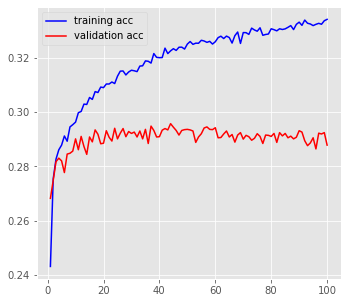

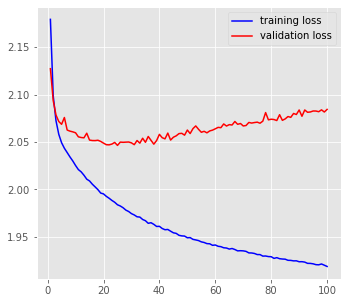

In [51]:
plot_history(history4)

# Prédiction

In [130]:
print(X_test[0])
y_pred= model4.predict(X_test[0], verbose=1, batch_size=None) # doit etre la liste d'emotion

[  65   19 3681    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
4/4 [==============================] - 0s 1ms/step


In [131]:
print(X_test.shape)
print(y_pred.shape)

(10000, 116)
(116, 13)


In [132]:
sum(y_pred)

array([4.8000136e-01, 4.9643595e-02, 8.0708942e+00, 9.5978183e-01,
       3.0812359e+00, 6.3358598e+00, 1.8535086e+00, 5.9874220e+00,
       5.9477535e+01, 1.1980749e+00, 8.2309275e+00, 6.3256340e+00,
       1.3949430e+01], dtype=float32)

In [125]:
print(classification_report(y_test, y_pred.argmax(1))) #.argmax La valeur maximale le long d'un axe donné. 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00       203
           3       0.00      0.00      0.00       202
           4       0.08      0.00      0.00       450
           5       0.24      0.33      0.27      1290
           6       0.40      0.07      0.12       340
           7       0.33      0.29      0.31       949
           8       0.32      0.49      0.39      2166
           9       0.31      0.01      0.03       382
          10       0.27      0.15      0.19      1296
          11       0.29      0.00      0.01       549
          12       0.28      0.43      0.34      2102

    accuracy                           0.29     10000
   macro avg       0.19      0.14      0.13     10000
weighted avg       0.27      0.29      0.25     10000



In [410]:
# fonction de prédiction sur phrase lambda

#text = ['wants to hang out with friends SOON!'] #enthusiasm
text = ['Damm servers still down  i need to hit 80 before all the koxpers pass me'] #worry

def emo (text):
    
    X_text = tok.texts_to_sequences(text)
    X_text_pad = pad_sequences(X_text, padding='post', maxlen=maxlen)
   
    y_pred= model2.predict(X_test[0], verbose=1, batch_size=None)
    Y_pred_class= np.argmax(y_pred,axis=1) 
    pred_class = le.inverse_transform(Y_pred_class)
    emotion = np.unique(pred_class)
    return(text,X_text, emotion )

In [411]:
(emo(text))
#model 2 - 4

1/1 [==============================] - 0s 4ms/step


(['Damm servers still down  i need to hit 80 before all the koxpers pass me'],
 [[2671, 4687, 3694, 311, 1690, 671, 400]],
 array(['neutral', 'sadness'], dtype=object))

In [352]:
tok.word_index['want']

4687